In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

In [2]:
class Config:
    positive_class = 8 ## 8이 포함되면 
    
    bag_size = 3
    train_bag_count = 1000
    val_bag_count = 300

cfg = Config()

In [3]:
train_data = datasets.MNIST(root='../data/',
                            train=True,
                            download=True,
                            )
                            # transform=transforms.ToTensor())
test_data = datasets.MNIST(root = '../data/',
                           train=False,
                           download=True,
                            )
                        #    transform=transforms.ToTensor())

print('number of training data : ', len(train_data))
print('number of test data : ', len(test_data))

number of training data :  60000
number of test data :  10000


In [4]:
input_data = list()
input_labels = list()

for data in train_data:
    input_data.append(np.array(data[0]))
    input_labels.append(data[1])

input_data = np.array(input_data)
input_labels = np.array(input_labels)

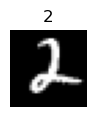

In [6]:
idx = np.random.randint(0, input_data.shape[0])
plt.figure(figsize=(1,1))
plt.axis('off')
plt.title(input_labels[idx])
plt.imshow(input_data[idx], 'gray')
plt.show()

In [19]:
bags = []
bag_labels = []

for _ in range(cfg.train_bag_count):
    index = np.random.choice(input_data.shape[0], cfg.bag_size, replace=False) ## 비복원 추출
    instances_data = input_data[index]
    instances_labels = input_labels[index]

    bag_label = 0
    if cfg.positive_class in instances_labels:
        bag_label = 1

    bags.append(instances_data)
    bag_labels.append(bag_label)

bags = np.array(bags)
bags = np.expand_dims(bags, axis=2)
bag_labels = np.array(bag_labels)

positive_count = bag_labels.sum()

print(f"Positive bags: {positive_count}")
print(f"Negative bags: {cfg.train_bag_count - positive_count}")

Positive bags: 262
Negative bags: 738


In [20]:
bags.shape

(1000, 3, 1, 28, 28)